All importations 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import adjusted_rand_score

extract data and check if all data are valid.

In [57]:
data = pd.read_csv("creditcard.csv")
target = 'Class'

features = ['Time','Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
             'V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23',
             'V24','V25','V26','V27','V28']

nan_check = data.isnull().sum().sum()

if nan_check == 0:
    print("The dataset does not contain any NaN values.")
else:
    print("The dataset contains NaN values.")

The dataset does not contain any NaN values.


show head of data.

In [58]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Clustering with K-means

In [60]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

D:\Code\Python\enves\hoosh\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


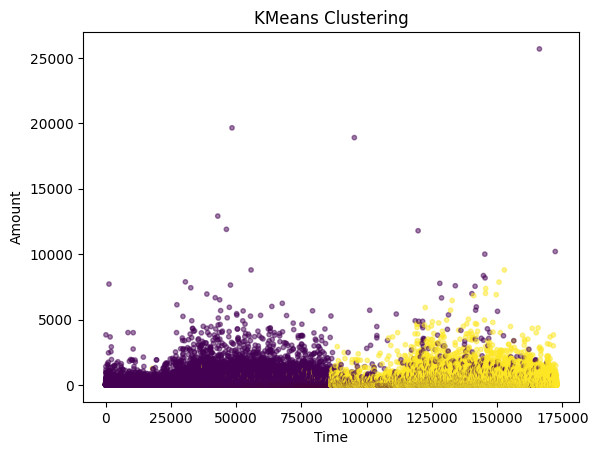

In [61]:
plt.scatter(data['Time'], data['Amount'], c=data['Cluster'], cmap='viridis', s=10, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

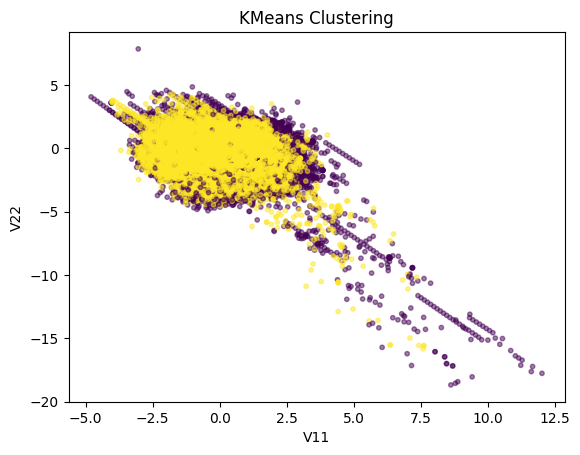

In [62]:
plt.scatter(data['V11'], data['V12'], c=data['Cluster'], cmap='viridis', s=10, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('V11')
plt.ylabel('V22')
plt.show()

Now we want to calculate F1 score for this 2-mean clustering

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Class'], test_size=0.2, random_state=42)

y_pred_train = kmeans.fit_predict(X_train)

# Calculate F1 score on the training set
f1_train = f1_score(y_train, y_pred_train)

# Apply KMeans clustering on the test set
y_pred_test = kmeans.predict(X_test)

# Calculate F1 score on the test set
f1_test = f1_score(y_test, y_pred_test)


print("F1 Score on Training Set:", f1_train)
print("F1 Score on Test Set:", f1_test)

D:\Code\Python\enves\hoosh\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


F1 Score on Training Set: 0.0038385249785187142
F1 Score on Test Set: 0.0038531933339755325


The F1 score is so low, we calculate rand index score too.

In [64]:
rand_index = adjusted_rand_score(data[target], data['Cluster'])

print("Rand Index:", rand_index)

Rand Index: -7.442935203704969e-05


Rand index is smaller than -0.000075 and base on adjusted_rand_score function documentation, the adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

This shows that clustering is not a good way to analyse this data. Now we try analysing this data by classification.
We use Random Forest classifier for this purpose

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9995786664794073
F1 Score: 0.8636363636363635
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



We see that f1 for class==1 is not good enough and its because our data is so imbalanced. We now balance dataset and classifier it again.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the scaled test data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9996137776061234
F1 Score: 0.8750000000000001
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



There is a little improvement for f1 score.